# Análisis por Bandas de Frecuencia

Este notebook permite analizar señales de vibración por bandas de frecuencia específicas, incluyendo visualización interactiva del espectro y selección de bandas.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import fftpack
import ipywidgets as widgets
from IPython.display import display
import os
import sys
import glob

# Asegurarse de que el paquete vibration_analysis esté en el path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from vibration_analysis.features.frequency_domain import FrequencyFeatureExtractor
from vibration_analysis.features.time_domain import TimeFeatureExtractor
from vibration_analysis.utils.frequency_analysis_utils import FrequencyBandAnalyzer

## Típico proceso manual

In [2]:
def load_signal(file_path):
    """Carga una señal desde un archivo CSV."""
    return pd.read_csv(file_path, header=None).values

def plot_spectrum(signal, fs=1600):
    """Grafica el espectro de frecuencia de la señal."""
    n_channels = signal.shape[1] if len(signal.shape) > 1 else 1
    fig, axes = plt.subplots(n_channels, 1, figsize=(12, 4*n_channels))
    if n_channels == 1:
        axes = [axes]
    
    for i in range(n_channels):
        channel_signal = signal[:, i] if n_channels > 1 else signal
        fft = fftpack.fft(channel_signal)
        freqs = fftpack.fftfreq(len(channel_signal), d=1/fs)[:len(channel_signal)//2]
        magnitude = np.abs(fft)[:len(channel_signal)//2]
        
        axes[i].plot(freqs, magnitude)
        axes[i].set_xlabel('Frecuencia (Hz)')
        axes[i].set_ylabel('Magnitud')
        axes[i].set_title(f'Espectro Canal {i+1}')
        axes[i].grid(True)
    
    plt.tight_layout()
    return fig, axes

def highlight_band(ax, freq_min, freq_max, color='red', alpha=0.2):
    """Resalta una banda de frecuencia en el gráfico."""
    ylims = ax.get_ylim()
    ax.fill_between([freq_min, freq_max], [ylims[0], ylims[0]], 
                    [ylims[1], ylims[1]], color=color, alpha=alpha)
    ax.set_ylim(ylims)

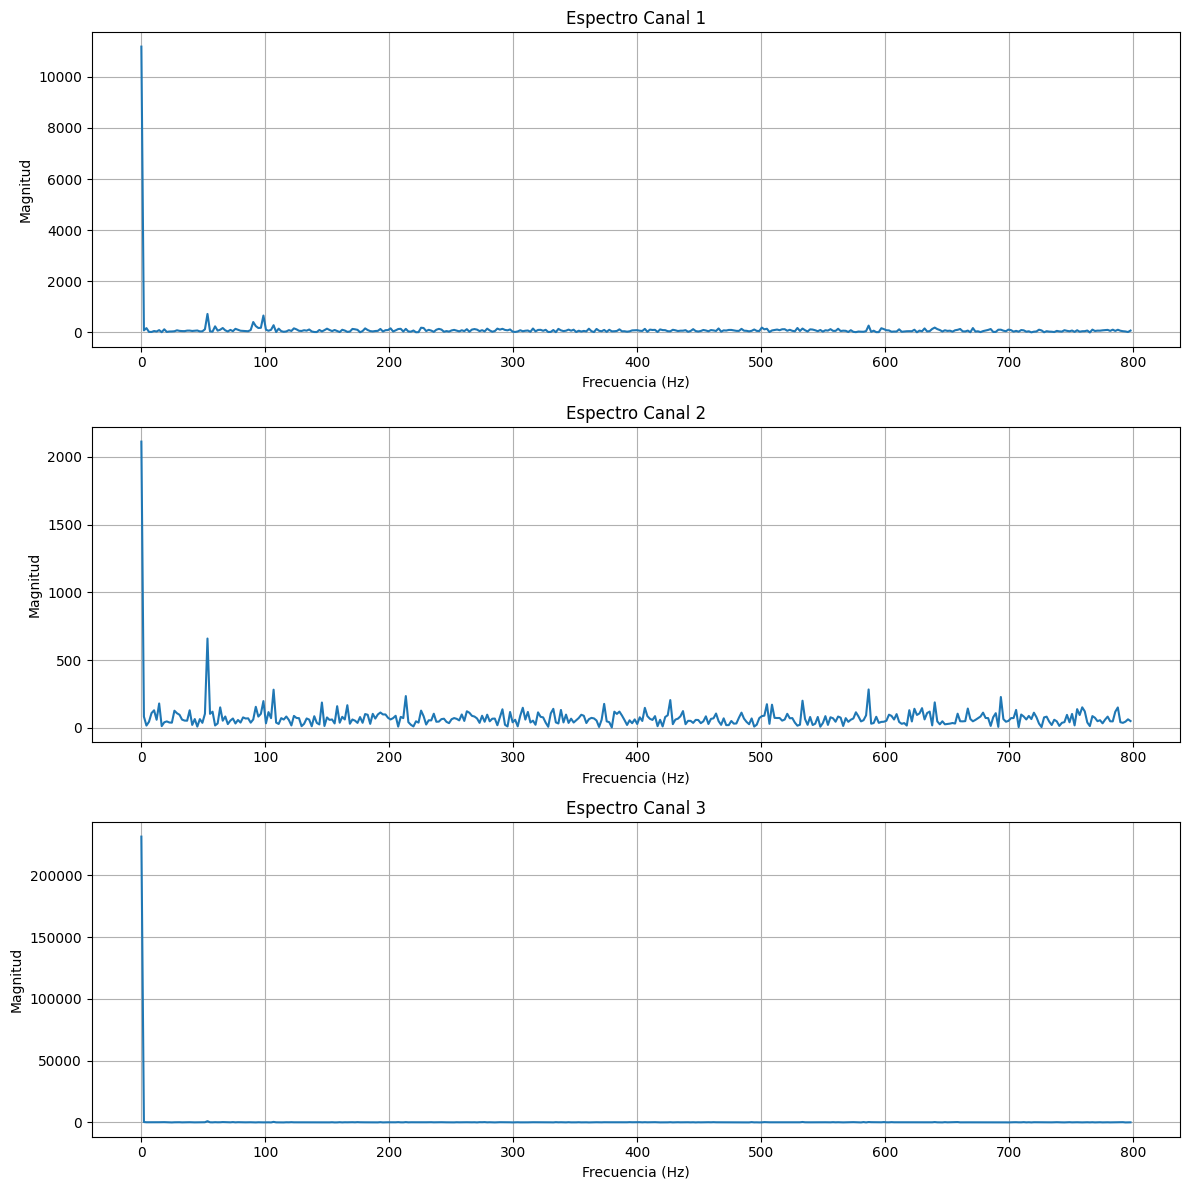

In [3]:
# Cargar una señal de ejemplo
data_dir = os.path.join('..', 'data')
normal_files = glob.glob(os.path.join(data_dir, 'normales', '**', '*.csv'), recursive=True)
anomaly_files = glob.glob(os.path.join(data_dir, 'anormales', '**', '*.csv'), recursive=True)

# Cargar la primera señal normal como ejemplo
example_signal = load_signal(normal_files[0])

# Graficar su espectro
fig, axes = plot_spectrum(example_signal)
plt.show()

## Análisis por Bandas de Frecuencia

In [7]:
# Crear el analizador con parámetros personalizados
analyzer = FrequencyBandAnalyzer(
    fs=1600,  # Opcional, también se puede especificar en set_signal
    freq_min=0,  # Opcional
    freq_max=None,  # Opcional, usará fs/2
    low_freq_cutoff=2.0  # Opcional
)

"""
# O crear con valores por defecto y especificar fs al cargar la señal
analyzer = FrequencyBandAnalyzer()
analyzer.set_signal(example_signal, fs=1600)
"""

analyzer.set_signal(example_signal)
# Mostrar controles
analyzer.display_controls()

Banda agregada: 50.6-200.0 Hz

Bandas actuales:
Banda 1: 50.6-200.0 Hz


Banda agregada: 221.5-322.2 Hz

Bandas actuales:
Banda 1: 50.6-200.0 Hz
Banda 2: 221.5-322.2 Hz


Banda agregada: 398.7-495.9 Hz

Bandas actuales:
Banda 1: 50.6-200.0 Hz
Banda 2: 221.5-322.2 Hz
Banda 3: 398.7-495.9 Hz


In [8]:
# Analizar características por bandas
freq_extractor = FrequencyFeatureExtractor(fs=1600)
freq_extractor.set_frequency_bands(analyzer.get_bands())

# Extraer características
features = freq_extractor.extract(example_signal)

# Mostrar características por banda
print("\nCaracterísticas por banda:")
for key, value in features.items():
    if 'Hz' in key:  # Solo mostrar características de bandas
        print(f"{key}: {value:.2f}")


Características por banda:
spectral_centroid_50_200Hz_x: 111.86
spectral_spread_50_200Hz_x: 43.02
spectral_rms_50_200Hz_x: 161.23
spectral_energy_50_200Hz_x: 1897650.31
peak_frequency_50_200Hz_x: 53.33
mean_frequency_50_200Hz_x: 111.86
spectral_centroid_221_322Hz_x: 271.53
spectral_spread_221_322Hz_x: 29.31
spectral_rms_221_322Hz_x: 92.78
spectral_energy_221_322Hz_x: 430408.09
peak_frequency_221_322Hz_x: 225.64
mean_frequency_221_322Hz_x: 271.53
spectral_centroid_398_495Hz_x: 446.99
spectral_spread_398_495Hz_x: 29.45
spectral_rms_398_495Hz_x: 83.53
spectral_energy_398_495Hz_x: 341873.19
peak_frequency_398_495Hz_x: 465.64
mean_frequency_398_495Hz_x: 446.99
spectral_centroid_50_200Hz_y: 118.14
spectral_spread_50_200Hz_y: 47.11
spectral_rms_50_200Hz_y: 116.86
spectral_energy_50_200Hz_y: 996860.43
peak_frequency_50_200Hz_y: 53.33
mean_frequency_50_200Hz_y: 118.14
spectral_centroid_221_322Hz_y: 272.84
spectral_spread_221_322Hz_y: 29.42
spectral_rms_221_322Hz_y: 75.99
spectral_energy_221_32

In [9]:
len(features) # Cantidad de features

96